In [205]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from textwrap import TextWrapper

#some settings
#sns.set_palette("Paired")
sns.set_palette("husl", 8)

In [57]:
import datetime

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Scaler & Classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [60]:
df_model = pd.read_csv('data/TransformedTelcoCustomerChurn.csv')
df_model

tenure  MonthlyCharges  servicesCount  PhoneService_Yes  \
0          1           29.85              2                 0   
1         34           56.95              4                 1   
2          2           53.85              4                 1   
3         45           42.30              4                 0   
4          2           70.70              2                 1   
...      ...             ...            ...               ...   
7038      24           84.80              8                 1   
7039      72          103.20              7                 1   
7040      11           29.60              2                 0   
7041       4           74.40              3                 1   
7042      66          105.65              7                 1   

      MultipleLines_Yes  OnlineSecurity_Yes  OnlineBackup_Yes  \
0                     0                   0                 1   
1                     0                   1                 0   
2                     0                   1                 1   
3                     0                   1                 0   
4                     0                   0                 0   
...                 ...                 ...               ...   
7038                  1                   1                 0   
7039                  1                   0                 1   
7040                  0                   1                 0   
7041                  1                   0                 0   
7042                  0                   1                 0   

      DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
0                        0                0                0   
1                        1                0                0   
2                        0                0                0   
3                        1                1                0   
4                        0                0                0   
...                    ...              ...              ...   
7038                     1                1                1   
7039                     1                0                1   
7040                     0                0                0   
7041                     0                0                0   
7042                     1                1                1   

      StreamingMovies_Yes  Churn  InternetService_DSL  \
0                       0      0                    1   
1                       0      0                    1   
2                       0      1                    1   
3                       0      0                    1   
4                       0      1                    0   
...                   ...    ...                  ...   
7038                    1      0                    1   
7039                    1      0                    0   
7040                    0      0                    1   
7041                    0      1                    0   
7042                    1      0                    0   

      InternetService_FiberOptic  Contract_MonthToMonth  Contract_OneYear  \
0                              0                      1                 0   
1                              0                      0                 1   
2                              0                      1                 0   
3                              0                      0                 1   
4                              1                      1                 0   
...                          ...                    ...               ...   
7038                           0                      0                 1   
7039                           1                      0                 1   
7040                           0                      1                 0   
7041                           1                      1                 0   
7042                           1                      0                 0   

      PaymentMethod_BankTransfer  PaymentMethod_ElectronicCheck  

In [12]:
X = df_model.drop(columns = ['Churn'])
y = df_model['Churn'].copy()

In [13]:
# Train, Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
#gridSearch scoring, equal for all the classifier used foward
scores = {'f1_binary': make_scorer(f1_score, average='binary'),'AUC': 'roc_auc', 'Accuracy': 'accuracy'}

In [242]:
results = pd.DataFrame(columns=['classifier','score','value'])

## Random Forest Classifier
print('> Random Forest Classifier')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__n_estimators': [32,64,100],
    'clf__max_depth': [6,7,8,9,10,11,12]
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['Random Forest Classifier','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Random Forest Classifier','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Random Forest Classifier','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Random Forest Classifier','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
bestAUC = auc(false_positive_rate, true_positive_rate)
bestModelName = 'Random Forest Classifier'
bestModel = cv

print('> Random Forest Classifier fitted with success')


## Gradient-Boosted Classifier
print('> Gradient-Boosted Classifier')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__n_estimators': [32,64,100],
    'clf__max_depth': [6,7,8,9,10,11,12]
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['Gradient-Boosted Classifier','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Gradient-Boosted Classifier','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Gradient-Boosted Classifier','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Gradient-Boosted Classifier','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
currentAUC = auc(false_positive_rate, true_positive_rate)
if currentAUC > bestAUC:
    bestModelName = 'Gradient-Boosted Classifier'
    bestModel = cv
    bestAUC = currentAUC

print('> Gradient-Boosted Classifier fitted with success')


## Desicion Tree Classifier
print('> Desicion Tree Classifier')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__max_depth': [1,2,3,4,5,6,7,8],
    'clf__min_samples_split': [0.1,0.2,0.3,0.4],
    'clf__min_samples_leaf': [0.2]
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['Desicion Tree Classifier','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Desicion Tree Classifier','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Desicion Tree Classifier','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Desicion Tree Classifier','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
currentAUC = auc(false_positive_rate, true_positive_rate)
if currentAUC > bestAUC:
    bestModelName = 'Desicion Tree Classifier'
    bestModel = cv
    bestAUC = currentAUC
    
print('> Desicion Tree Classifier fitted with success')


## Support Vectors Classifier (SVC)
print('> Support Vectors Classifier (SVC)')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__kernel': ['linear','rbf','poly','sigmoid']
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['Support Vectors Classifier (SVC)','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Support Vectors Classifier (SVC)','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Support Vectors Classifier (SVC)','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Support Vectors Classifier (SVC)','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
currentAUC = auc(false_positive_rate, true_positive_rate)
if currentAUC > bestAUC:
    bestModelName = 'Support Vectors Classifier (SVC)'
    bestModel = cv
    bestAUC = currentAUC
    
print('> Support Vectors Classifier (SVC) fitted with success')


## Logistic Regression
print('> Logistic Regression')

time_start = datetime.datetime.now()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])
parameters = {
    'scaler__with_mean': [True, False],
    'scaler__with_std': [True, False],
    'clf__solver': ['newton-cg','lbfgs','liblinear'],
    'clf__max_iter': [1000]
}
cv = GridSearchCV(pipeline, param_grid=parameters,scoring=scores,refit='AUC')
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

time_end = datetime.datetime.now()

#saving results
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
results = results.append(pd.DataFrame(np.array([['Logistic Regression','AUC',auc(false_positive_rate, true_positive_rate)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Logistic Regression','F1-score',f1_score(y_test, y_pred, average='binary')]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Logistic Regression','Accuracy',accuracy_score(y_test, y_pred)]]),columns=['classifier','score','value']))
results = results.append(pd.DataFrame(np.array([['Logistic Regression','Time',(time_end-time_start).total_seconds()]]),columns=['classifier','score','value']))
#saving best model
currentAUC = auc(false_positive_rate, true_positive_rate)
if currentAUC > bestAUC:
    bestModelName = 'Logistic Regression'
    bestModel = cv
    bestAUC = currentAUC

print('> Logistic Regression fitted with success')
print('All models fitted')

> Random Forest Classifier
> Random Forest Classifier fitted with success
> Gradient-Boosted Classifier
> Gradient-Boosted Classifier fitted with success
> Desicion Tree Classifier
> Desicion Tree Classifier fitted with success
> Support Vectors Classifier (SVC)
> Support Vectors Classifier (SVC) fitted with success
> Logistic Regression
> Logistic Regression fitted with success
All models fitted


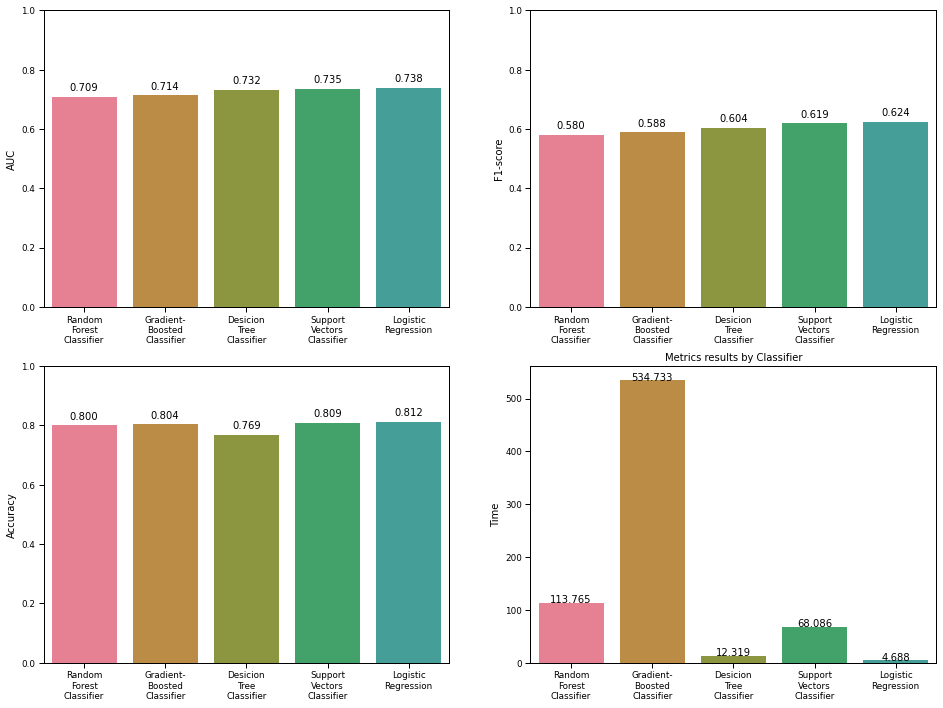

In [318]:
#Display the results

#convert results from string to float
results['value'] = results['value'].astype(float)

fig, ax = plt.subplots(2,2, figsize=(16,12)) 

ax[0][0] = sns.barplot(x="classifier",y="value",data=results[results['score']=='AUC'], ax=ax[0][0])
ax[0][1] = sns.barplot(x="classifier",y="value",data=results[results['score']=='F1-score'], ax=ax[0][1])
ax[1][0] = sns.barplot(x="classifier",y="value",data=results[results['score']=='Accuracy'], ax=ax[1][0])
ax[1][1] = sns.barplot(x="classifier",y="value",data=results[results['score']=='Time'], ax=ax[1][1])

#scaling y axis
ax[0][0].set(ylim=(0, 1))
ax[0][1].set(ylim=(0, 1))
ax[1][0].set(ylim=(0, 1))

#adding column labels in each chart
for p in ax[0][0].patches:
    ax[0][0].text(x = p.get_x()+0.4, y = p.get_height()+0.02, s = '{:.3f}'.format(p.get_height()), ha = 'center')
for p in ax[0][1].patches:
    ax[0][1].text(x = p.get_x()+0.4, y = p.get_height()+0.02, s = '{:.3f}'.format(p.get_height()), ha = 'center')
for p in ax[1][0].patches:
    ax[1][0].text(x = p.get_x()+0.4, y = p.get_height()+0.02, s = '{:.3f}'.format(p.get_height()), ha = 'center')
for p in ax[1][1].patches:
    ax[1][1].text(x = p.get_x()+0.4, y = p.get_height()+0.08, s = '{:.3f}'.format(p.get_height()), ha = 'center')

#Wrapping the text on x axis
classifiers = ['Random Forest Classifier','Gradient-Boosted Classifier','Desicion Tree Classifier','Support Vectors Classifier','Logistic Regression']
wrapper = TextWrapper(width=10,break_long_words=True,break_on_hyphens=True)
ax[0][0].set_xticklabels([wrapper.fill(text) for text in classifiers])
ax[0][1].set_xticklabels([wrapper.fill(text) for text in classifiers])
ax[1][0].set_xticklabels([wrapper.fill(text) for text in classifiers])
ax[1][1].set_xticklabels([wrapper.fill(text) for text in classifiers])

#Setting axis main labels
ax[0][0].set(xlabel='', ylabel='AUC')
ax[0][1].set(xlabel='', ylabel='F1-score')
ax[1][0].set(xlabel='', ylabel='Accuracy')
ax[1][1].set(xlabel='', ylabel='Time')

plt.title("Metrics results by Classifier")
plt.show()

In [246]:
print('Best Model: {}'.format(bestModelName))
print('Best Model Parameters: {}'.format(bestModel.best_params_))

Best Model: Logistic Regression
Best Model Parameters: {'clf__max_iter': 1000, 'clf__solver': 'liblinear', 'scaler__with_mean': True, 'scaler__with_std': True}


In [312]:
## Runing the best model with the best parameters
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True,with_std=True)),
    ('clf', LogisticRegression(solver='liblinear',max_iter=1000))
])
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [338]:
feature_importance = pd.DataFrame({'feature':list(X_train.columns),'weight':list(np.ndarray.flatten(model.steps[1][1].coef_))})
feature_importance.sort_values(by='weight',ascending=False,inplace=True)

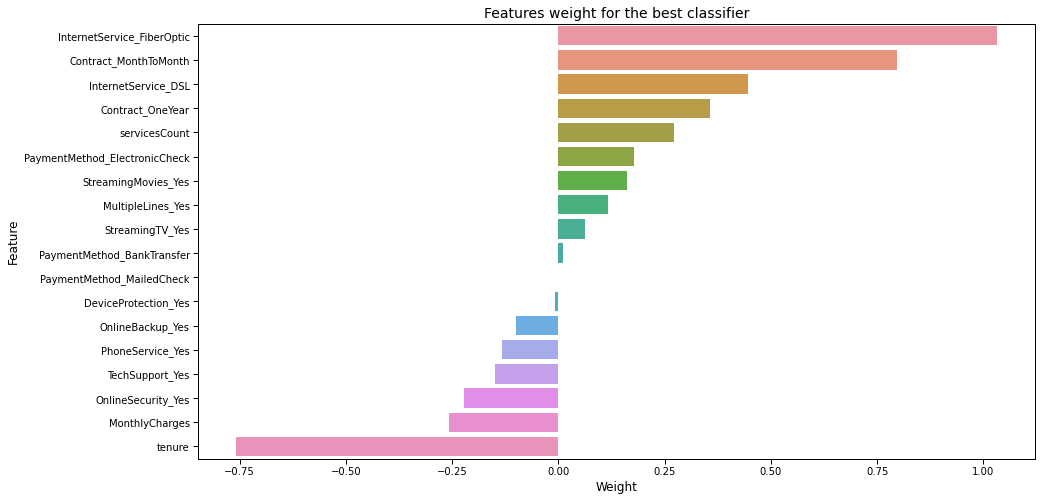

In [349]:
#Display the results
plt.figure(figsize=(15, 8))
g = sns.barplot(x='weight',y='feature',data=feature_importance)

#Resize labels
g.axes.set_title("Features weight for the best classifier",fontsize=14)
g.set_xlabel('Weight',fontsize=12)
g.set_ylabel('Feature',fontsize=12)
for tick in g.xaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
for tick in g.yaxis.get_major_ticks():
    tick.label.set_fontsize(10) 

plt.show()